<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/CNN_with_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu -U

     |████████████████████████████████| 320.4MB 47kB/s 


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense,  Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
x_train = np.expand_dims(x_train, -1);
x_test = np.expand_dims(x_test, -1);

print(x_train.shape)


(60000, 28, 28, 1)


In [6]:
K = len(set(y_train))

print(f"number of classes:{K}")

number of classes:10


In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu' )(i)
x = Conv2D(64, (3,3), strides=2, activation='relu' )(x)
x = Conv2D(128, (3,3), strides=2, activation='relu' )(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='softmax')(x)

model = Model(i,x)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5770 - accuracy: 0.7928 - val_loss: 0.4047 - val_accuracy: 0.8464
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3714 - accuracy: 0.8622 - val_loss: 0.3498 - val_accuracy: 0.8678
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3193 - accuracy: 0.8812 - val_loss: 0.3339 - val_accuracy: 0.8773
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2848 - accuracy: 0.8936 - val_loss: 0.3264 - val_accuracy: 0.8826
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2595 - accuracy: 0.9028 - val_loss: 0.3039 - val_accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2373 - accuracy: 0.9112 - val_loss: 0.3131 - val_accuracy: 0.8902
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2200 - accuracy: 0.9173 - val_loss: 0.2925 - val_accuracy:

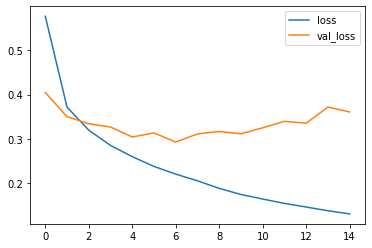

In [10]:

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

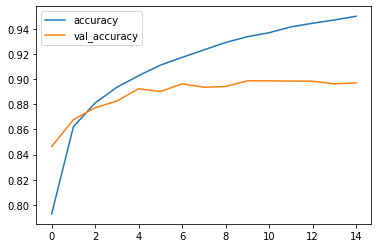

In [11]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[790   1  27  23   3   2 142   0  12   0]
 [  1 974   2  14   5   0   1   0   3   0]
 [ 11   1 857   7  61   0  60   0   3   0]
 [  9   3  19 874  56   0  36   0   2   1]
 [  0   1  50  11 886   0  52   0   0   0]
 [  0   0   0   0   0 979   0   7   2  12]
 [ 74   1  64  20 114   0 717   0  10   0]
 [  0   0   0   0   0  20   0 957   0  23]
 [  1   1   3   3   4   2   5   2 979   0]
 [  1   0   0   0   0   5   0  36   0 958]]


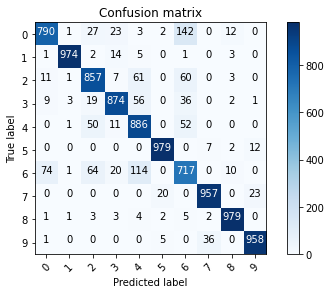

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label:Ankle boot, predicted as Sneaker')

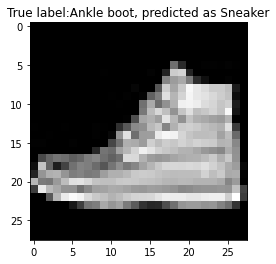

In [18]:
#show some misclassified examples
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title(f"True label:{labels[y_test[i]]}, predicted as {labels[p_test[i]]}")